In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x= data['data'][:,(2,3)]
y=data['target']

In [5]:
setosa_or_versicolor = (y == 0) | (y == 1) #| (y==3)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

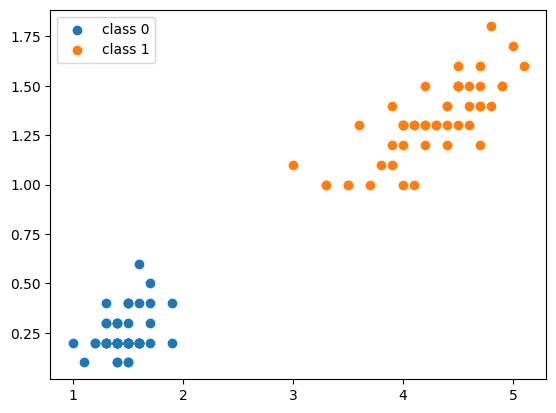

In [6]:
plt.scatter(x[:,0][y==0],x[:,1][y==0],label='class 0')
plt.scatter(x[:,0][y==1],x[:,1][y==1],label='class 1')
#plt.scatter(x[:,0][y==2],x[:,1][y==2],label='class 2')
plt.legend()
plt.show()

In [7]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
svc = SVC(kernel='linear',C= 1e6)

In [9]:
svc.fit(x,y)

SVC(C=1000000.0, kernel='linear')

In [10]:
svc.coef_

array([[1.29411744, 0.82352928]])

In [11]:
svc.intercept_

array([-3.78823471])

In [22]:
def plot_svc_decision_boundary(svc,xmin,xmax):
    w = svc.coef_[0]
    b = svc.intercept_[0]
    
    x0 =np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1] * x0 -b/w[1]
    
    margin =1/w[1]
    gutter_up = decision_boundary+margin
    gutter_down = decision_boundary-margin
    
    svs =svc.support_vectors_
    
    plt.scatter(svs[:,0],svs[:,1], s=100,facecolors='#FFAAAA',label="support vectors")
    plt.plot(x0, decision_boundary,"k-",linewidth=2,label="hyperplane")
    plt.plot(x0, gutter_up, "k--",linewidth=1,label="gutterup",color="red")
    plt.plot(x0, gutter_down, "k--",linewidth=2,label="gutterdown")
    plt.legend()

C:\Users\abhes\AppData\Local\Temp\ipykernel_6524\1166161147.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0, gutter_up, "k--",linewidth=1,label="gutterup",color="red")


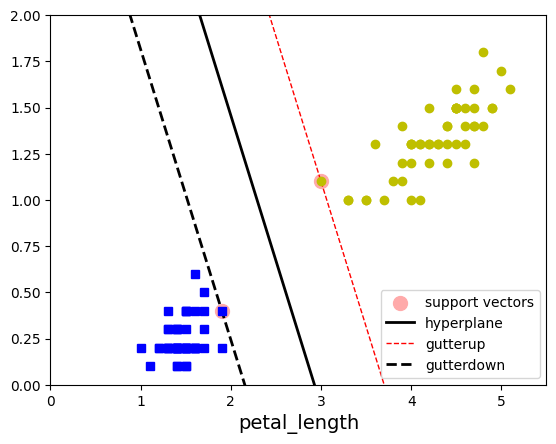

In [16]:
plot_svc_decision_boundary(svc,0,6)
plt.plot(x[:,0][y==0],x[:,1][y==0],"bs")
plt.plot(x[:,0][y==1],x[:,1][y==1],"yo")
plt.xlabel("petal_length",fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

In [21]:
svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

<AxesSubplot: >

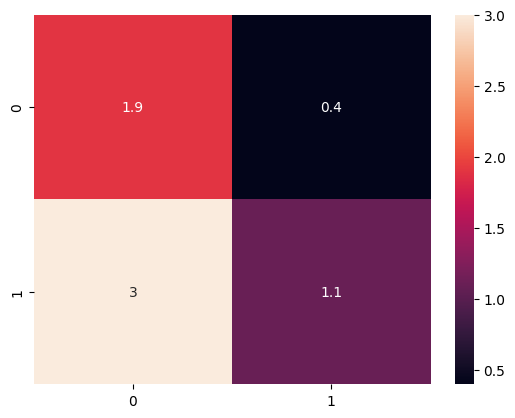

In [26]:
sns.heatmap(svc.support_vectors_,annot=True)